The purpose of this notebook is to do one last analysis to try to see if genera tend to vary in the same direction across different diseases.

Rafa suggested doing something very simple: average effects for each disease, then do a t-test to see if the distribution of effects per genus is significantly different from zero.

We could also do something slightly more complicated and included NaNs and use a multinomial. (But I'm not sure how you would average across diseases then... not sure how many genera are NaN within a disease)

Anyway, let's see.


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
from scipy.stats import ttest_1samp
from statsmodels.sandbox.stats.multicomp import multipletests

In [10]:
# Note: this file has effects calculated only for genera which were sig in at least one study.
# May want to change this later.
feffects = '../../data/analysis_results/qvalues.mean.kruskal-wallis.case-control.log2change.sig_ordered.txt'

df = pd.read_csv(feffects, sep='\t', index_col=0)
df = df.rename(columns={'edd_singh': 'cdi_singh', 'noncdi_schubert': 'cdi_schubert2'})
df.head()

,cdi_youngster,hiv_noguerajulian,hiv_lozupone,t1d_alkanani,cdi_singh,asd_son,crc_zeller,liv_zhang,ibd_papa,ob_zhu,...,crc_chen,ob_goodrich,hiv_dinh,cdi_schubert2,ibd_morgan,ob_zupancic,ob_turnbaugh,t1d_mejialeon,ibd_willing,nash_wong
k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium,10.356049,0.423552,0.662429,NaN,5.222960,NaN,1.271690,3.470789,10.356049,10.356049,...,1.532649,3.761708,4.114671,5.263545,NaN,NaN,NaN,0.753039,5.532374,0.203231
k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Cetobacterium,NaN,NaN,5.871373,NaN,10.356049,NaN,NaN,NaN,NaN,10.356049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k__Bacteria;p__Lentisphaerae;c__Lentisphaeria;o__Victivallales;f__Victivallaceae;g__Victivallis,10.356049,0.885772,3.075544,NaN,-4.377625,0.069582,0.963358,NaN,NaN,NaN,...,NaN,-1.031472,NaN,-2.996785,NaN,NaN,NaN,10.356049,NaN,NaN
k__Bacteria;p__Lentisphaerae;c__Oligosphaeria;o__Oligosphaerales;f__Oligosphaeraceae;g__Oligosphaera,NaN,-1.825743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae;g__Coraliomargarita,NaN,-1.346087,NaN,NaN,NaN,-0.420719,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Average effects across diseases

In [11]:
# Let's first melt this dataframe, to make these operations easier

melted = pd.melt?

In [18]:
melted = pd.melt(df.reset_index(), id_vars='index', var_name='dataset', value_name='effect').dropna()
#melted.head()

In [19]:
melted = melted.rename(columns={'index': 'genus'})
melted['disease'] = melted['dataset'].str.split('_').str[0]
melted.head()

,genus,dataset,effect,disease
0,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,cdi_youngster,10.356049,cdi
2,k__Bacteria;p__Lentisphaerae;c__Lentisphaeria;...,cdi_youngster,10.356049,cdi
5,k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...,cdi_youngster,6.782807,cdi
6,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,cdi_youngster,10.356049,cdi
7,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,cdi_youngster,10.356049,cdi


In [49]:
diseffects = melted.groupby(['genus', 'disease']).mean().reset_index()

In [87]:
pvals = []
for g, subdf in diseffects.groupby('genus'):
    # If the genus is in at least 3 different diseases
    if subdf.shape[0] > 4:
        pvals.append([g, ttest_1samp(subdf['effect'].values, 0)[1]])


In [88]:
res = pd.DataFrame(data=pvals, columns=['genus', 'p'])

In [89]:
res['q'] = multipletests(res['p'])[1]

(array([   3.,    2.,    1.,    2.,    3.,    0.,    2.,    0.,    2.,  102.]),
 array([ 0.22847912,  0.30563121,  0.3827833 ,  0.45993539,  0.53708747,
         0.61423956,  0.69139165,  0.76854374,  0.84569582,  0.92284791,  1.        ]),
 <a list of 10 Patch objects>)

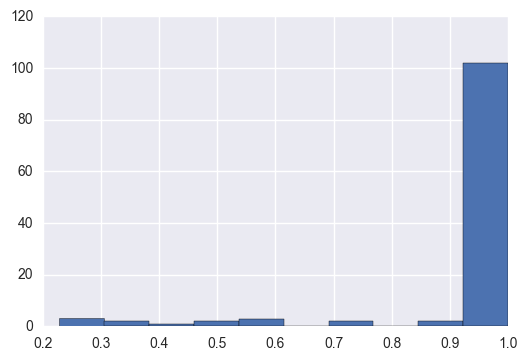

In [90]:
plt.hist(res.sort_values(by='q')['q'])